----
## **WeatherPy**
#### Submitted by : Sheetal Bongale | UT Data Analysis and Visualization
##### *This Jupyter notebook has a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.*
---

<b> Note: </b> Please find the written analysis of this data at the bottom of this jupyter notebook.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
# Define a function to perfome API Calls
def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    r = requests.get(url, params={"appid": api_key,"q": city, "units":"imperial"})
    if r.status_code == 200:        
        response = r.json()
        return response
    else:
        print("City not found. Skipping...")
        return None  

In [82]:
# Successive API calls and print log for each city
city_data = []
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n------------------------")

# Loop through the cities
for i,city in enumerate(cities):
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    city_results = get_weather(city, api_key)
    
    if city_results:
        city_data.append(city_results)
    
print("------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | shache
Processing Record 6 of Set 1 | sakakah
City not found. Skipping...
Processing Record 7 of Set 1 | kudahuvadhoo
Processing Record 8 of Set 1 | nantai
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | gravdal
Processing Record 16 of Set 1 | karamea
City not found. Skipping...
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 19 of Set 1 | tarudant
City not found. Skipping...
Processing Record 20 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
# Convert city data to dataframe and clean up
df=pd.DataFrame([{
    "City": data["name"],
    "Country": data["sys"]["country"],
    "Date": date.fromtimestamp(data['dt']).isoformat(),
    "Cloudiness": data["clouds"]["all"],
    "Humidity": data["main"]["humidity"],
    "Lat": data["coord"]["lat"],
    "Lng": data["coord"]["lon"],
    "Max Temp": data["main"]["temp_max"],
    "Wind Speed": data["wind"]["speed"]
} for data in city_data])
df.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,NO,2020-01-06,40,55,78.22,15.63,10.40,13.87
1,Punta Arenas,CL,2020-01-06,75,71,-53.16,-70.91,57.20,9.17
2,Narsaq,GL,2020-01-06,5,33,60.91,-46.05,-2.20,6.93
3,Shache,CN,2020-01-06,100,59,38.42,77.24,23.56,3.38
4,Kudahuvadhoo,MV,2020-01-06,84,81,2.67,72.89,81.37,12.97


In [85]:
# Export the city data into a .csv file
df.to_csv(output_data_file)
df.count()

City          546
Country       546
Date          546
Cloudiness    546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

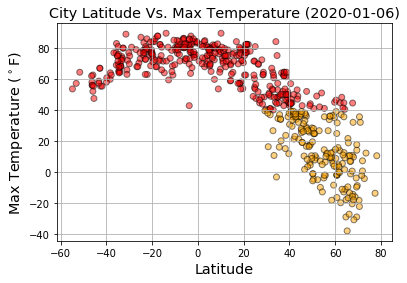

In [86]:
# Refine color visualization 
color = ["red" if value > 40 else "orange" for value in df["Max Temp"]]

#cmap = sns.cubehelix_palette(as_cmap=True)
plt.scatter(df["Lat"], df["Max Temp"], color=color, edgecolors="black", alpha = 0.5, marker = "o", cmap=cmap)
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Max Temperature ($^\circ$F)", fontsize="x-large")
plt.title("City Latitude Vs. Max Temperature ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_maxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

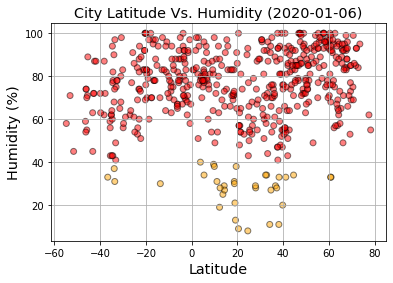

In [87]:
color = ["red" if value > 40 else "orange" for value in df["Humidity"]]
# Render glyphs
plt.scatter(df["Lat"], df["Humidity"], color = color, edgecolors='black', alpha = 0.5, marker = "o")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Humidity (%)", fontsize="x-large")
plt.title("City Latitude Vs. Humidity ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

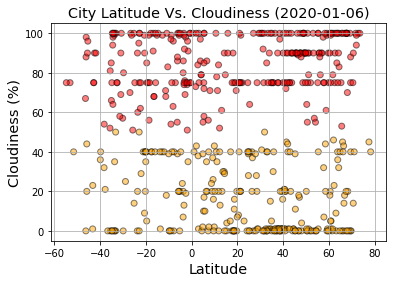

In [88]:
color = ["red" if value > 50 else "orange" for value in df["Cloudiness"]]
plt.scatter(df["Lat"], df["Cloudiness"], color = color, edgecolors='black', alpha = 0.5, marker = "o")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Cloudiness (%)", fontsize="x-large")
plt.title("City Latitude Vs. Cloudiness ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

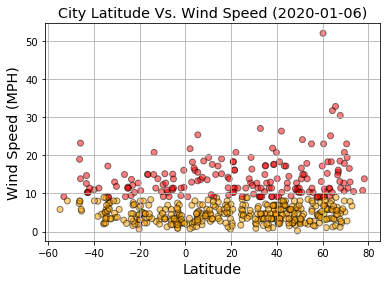

In [89]:
color = ["red" if value > 9 else "orange" for value in df["Wind Speed"]]
plt.scatter(df["Lat"], df["Wind Speed"], color = color, edgecolors='black', alpha = 0.5, marker = "o")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Wind Speed (MPH)", fontsize="x-large")
plt.title("City Latitude Vs. Wind Speed ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_windspeed.png")
plt.show()

## WeatherPy Data Analysis Report
Following were the trends observed after the analysis: